<a href="https://colab.research.google.com/github/pius-mn/flask-crud-mysql/blob/main/IMAGE_CLASSIFICATION_IN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader
!pip install ipython-autotime
%load_ext autotime
!mkdir images
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30, output_dir='images', adult_filter_off=True)
downloader.download("rugby ball leather",limit=30, output_dir='images', adult_filter_off=True)
downloader.download("ice cream cone",limit=30, output_dir='images', adult_filter_off=True)
downloader.download("dog",limit=30, output_dir='images', adult_filter_off=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
mkdir: cannot create directory ‘images’: File exists
[%] Downloading Images to /content/images/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.10wallpaper.com/wallpaper/2560x1440/1802/Pretty_sunflower_flowers_plant_closeup_2560x1440.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/70/28/15/7028151ff5ce9777b8105ee3acfe2522.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i0.wp.com/texdr.wordpress.com/files/2009/07/wpid1250-img_4975.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/dd/85/81/dd8581bedcebc7d2ac327d439d792dbd.jpg
[%] File Downloaded !

[

In [ ]:
#preprocessing data 
import numpy as np
!pip install opencv-python
import os
import random
import cv2
import pickle
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.48 s (started: 2022-06-08 15:52:14 +00:00)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import TensorBoard
import time
from skimage.io import imread #image processing read
from skimage.transform import resize #specific size of image

time: 6.56 ms (started: 2022-06-08 15:52:17 +00:00)


In [ ]:
data_dir='/content/images'
categories=['pretty sunflower', 'rugby ball leather', 'ice cream cone','dog']

time: 1.97 ms (started: 2022-06-08 15:52:17 +00:00)


In [ ]:
img_size=150
data=[] #
for category in categories:
  folder=os.path.join(data_dir,category)
  label=categories.index(category)

 # print(folder)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    # print(img_path)
    # break
    img_arr=cv2.imread(img_path)
    img_arr=cv2.resize(img_arr,(img_size,img_size))
    # plt.imshow(img_arr)
    # break
    data.append([img_arr,label])

time: 9.92 s (started: 2022-06-08 15:52:17 +00:00)


In [ ]:
random.shuffle(data)

time: 1.86 ms (started: 2022-06-08 15:52:27 +00:00)


In [ ]:
x=[]
y=[]
for features, labels in data:
  x.append(features)
  y.append(labels)
x=np.array(x)
y=np.array(y)

time: 13.1 ms (started: 2022-06-08 15:52:27 +00:00)


In [ ]:
x=x/255 # scale images from 0 t0 1

time: 26.4 ms (started: 2022-06-08 15:52:27 +00:00)


In [ ]:
x.shape

(127, 150, 150, 3)

time: 4.63 ms (started: 2022-06-08 15:52:27 +00:00)


In [ ]:

model= Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))#64 layers/featuers size 3x3
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))#64 layers/featuers size 3x3
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, input_shape=x.shape[1:], activation='relu'))
model.add(Dense(4, activation='softmax')) # 4 categories to predict

time: 50.5 ms (started: 2022-06-08 15:52:27 +00:00)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

time: 38.3 ms (started: 2022-06-08 15:52:27 +00:00)


In [ ]:
name=f'test-{int(time.time())}'
tensorboard=TensorBoard(log_dir=f'logs\\{name}\\')
model.fit(x,y, epochs=5, validation_split=0.1,batch_size=32,callbacks=[tensorboard])#validation_split part of data set kept for testing

Epoch 1/15
4/4 [==============================] - 10s 2s/step - loss: 4.6570 - accuracy: 0.2895 - val_loss: 1.4784 - val_accuracy: 0.3077
Epoch 2/15
4/4 [==============================] - 11s 3s/step - loss: 1.5140 - accuracy: 0.3246 - val_loss: 1.1731 - val_accuracy: 0.4615
Epoch 3/15
4/4 [==============================] - 9s 2s/step - loss: 1.0644 - accuracy: 0.5439 - val_loss: 1.0545 - val_accuracy: 0.4615
Epoch 4/15
4/4 [==============================] - 6s 2s/step - loss: 0.7493 - accuracy: 0.7632 - val_loss: 0.9611 - val_accuracy: 0.4615
Epoch 5/15
4/4 [==============================] - 6s 1s/step - loss: 0.4755 - accuracy: 0.7895 - val_loss: 0.5006 - val_accuracy: 0.8462
Epoch 6/15
4/4 [==============================] - 6s 1s/step - loss: 0.3032 - accuracy: 0.8860 - val_loss: 0.7420 - val_accuracy: 0.6923
Epoch 7/15
4/4 [==============================] - 6s 1s/step - loss: 0.2070 - accuracy: 0.9211 - val_loss: 0.4261 - val_accuracy: 0.9231
Epoch 8/15
4/4 [=======================

time: 2min 23s (started: 2022-06-08 15:52:27 +00:00)


In [ ]:
#tensorboard --logdir=logs/


time: 3.06 ms (started: 2022-06-08 15:54:51 +00:00)


In [ ]:
def image(path):
    img = imread(path)
    new_arr = resize(img, (img_size,img_size,3))
    plt.imshow(new_arr)
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, img_size,img_size, 3)
    return new_arr

time: 4.99 ms (started: 2022-06-08 15:54:51 +00:00)


enter url: https://th.bing.com/th/id/OIP.e0PQ9IKLw2WkAyG2R9DdlAHaHa?w=196&h=196&c=7&r=0&o=5&pid=1.7
predicted: rugby ball leather 

pretty sunflower : 2.3562709827729122e-05%
rugby ball leather : 77.56931781768799%
ice cream cone : 0.17832402372732759%
dog : 22.25232869386673%


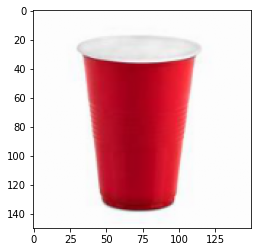

time: 4.42 s (started: 2022-06-08 15:59:48 +00:00)


In [ ]:
url=input("enter url: ")
prediction = model.predict([image(url)])
print(f'predicted: {categories[prediction.argmax()]} \n')

for index,item in enumerate(categories):
    print(f'{item} : {prediction[0][index]*100}%')


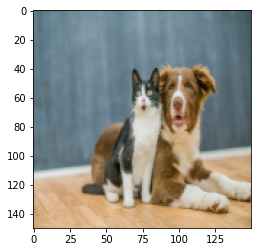

time: 396 ms (started: 2022-06-08 15:54:58 +00:00)


In [ ]:

img=imread("https://media.istockphoto.com/photos/cute-cat-and-dog-portrait-picture-id1137572791?b=1&k=20&m=1137572791&s=170667a&w=0&h=wcDi_MAi9xB-s00IIymYPhpG0dUK92_yfUeYJeOVQ-g=")
img_resized=resize(img,(150,150,3))
plt.imshow(img_resized)